<a href="https://colab.research.google.com/github/Guhan2348519/ADVANCED-ML-tasks/blob/main/2348519_LAB1_AML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**Inference**: Libraries included are NumPy, Pandas, Matplotlib, and Seaborn. NumPy is used for numerical computations, Pandas is a data manipulation and analysis library, Matplotlib is a plotting library, and Seaborn is a high-level interface for statistical graphics. Linear regression is used for linear regression modeling, and metrics like mean_squared_error and r2_score are used to evaluate regression models.

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Program_1_Dataset - Program_1_Dataset.csv')

In [6]:
data.head(5)

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [7]:
data.isna().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

**Inference**:From the above output it is clear that there is no missing values therefore we can proceed with analysis

In [8]:
data.describe()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Inference: The describe() method in pandas generates descriptive statistics of a data frame.It contains count, mean, min,max, std, and percentiles-25%,50%, and 75%

In [9]:
mean_value = data['MValue'].mean()
mean_value

22.532806324110673

The above code provides the mean value of the column MValue

Text(0, 0.5, 'MValue')

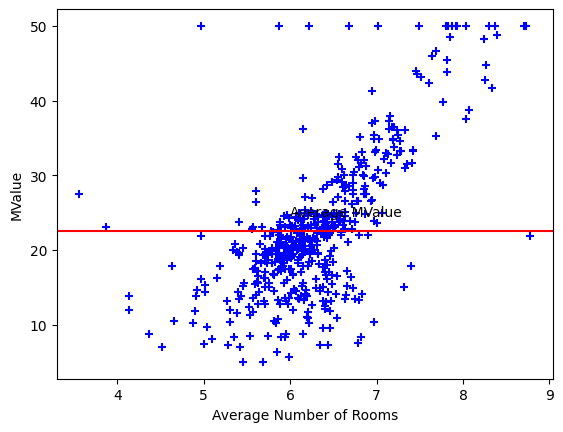

In [10]:
plt.scatter(data['Avg_rooms'], data['MValue'], color='blue', marker='+')
plt.axhline(y=mean_value, color='red')
plt.annotate("Average MValue", xy=(6, mean_value + 2))
plt.xlabel("Average Number of Rooms")
plt.ylabel("MValue")


The above graph represents the scatter plots with a horizontal line for the mean value Average Number of Rooms and MValue as Y axis. We can notice there are outlinear now we have to find the best fit line for the model.

In [16]:
model1 = data['MValue'].mean()
model2 = 10 + 20 * data['Avg_rooms']
model3 = 3 + 12 * data['Avg_rooms']
data['model1'] = model1
data['model2'] = model2
data['model3'] = model3
print(model1)
print(model2)
print(model3)

22.532806324110673
0      158.32
1      144.54
2      145.62
3      138.10
4      132.74
        ...  
501    127.08
502    139.18
503    136.82
504    135.02
505    133.70
Name: Avg_rooms, Length: 506, dtype: float64
0      91.992
1      83.724
2      84.372
3      79.860
4      76.644
        ...  
501    73.248
502    80.508
503    79.092
504    78.012
505    77.220
Name: Avg_rooms, Length: 506, dtype: float64


Inference: we create random three model to test and we add their values to the dataset

In [17]:
data['model1'] = model1
data['model2'] = model2
data['model3'] = model3
data.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue,min_model1,min_model2,min_model3,model1,model2,model3
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2,22.532806,158.32,91.992,22.532806,158.32,91.992
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5,22.532806,144.54,83.724,22.532806,144.54,83.724
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5,22.532806,145.62,84.372,22.532806,145.62,84.372
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6,22.532806,138.10,79.860,22.532806,138.10,79.860
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3,22.532806,132.74,76.644,22.532806,132.74,76.644


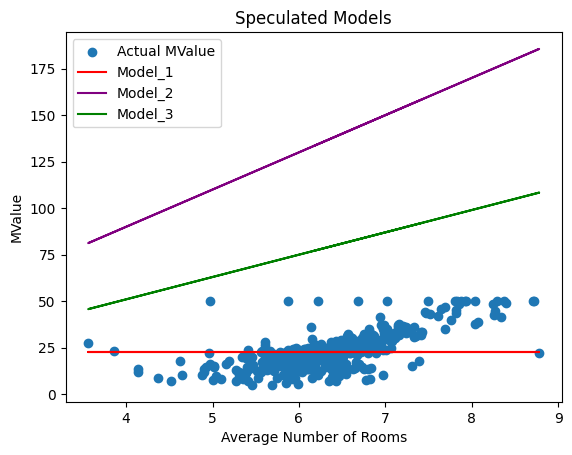

In [18]:
fig, ax = plt.subplots()
ax.scatter(x='Avg_rooms', y='MValue', data=data, label='Actual MValue')
ax.plot(data['Avg_rooms'], data['min_model1'], color='red', label='Model_1')
ax.plot(data['Avg_rooms'], data['min_model2'], color='purple', label='Model_2')
ax.plot(data['Avg_rooms'], data['min_model3'], color='green', label='Model_3')
ax.set_ylabel('MValue')
ax.set_xlabel('Average Number of Rooms')
ax.set_title("Speculated Models")
ax.legend()


In [19]:
model1_obs = pd.DataFrame({
    'Avg_rooms': data['Avg_rooms'],
    'Actual MValue': data['MValue'],
    'Predicted MValue': data['model1'],
    'Error': (data.model1 - data.MValue)
})
sum(model1_obs.Error**2)


42716.29541501977

 In the above code we calculate the sum of square errors for model 1

In [ ]:
x = data.Avg_rooms
y = data.MValue
xy = x * y
n = len(data)


Inference : we are splitting the data into x and y whic we use to find the best fit line

In [ ]:
xmean = data.Avg_rooms.mean()
ymean = data.MValue.mean()
numerator = xy.sum() - n * xmean * ymean
denominator = (x**2).sum() - n * (xmean**2)
m = numerator / denominator
c = ymean - (m * xmean)
print('intercept-c:', c, 'coefficient-m:', m)
min_best_fit_model = c + m * data.Avg_rooms
data['min_best_fit_model'] = min_best_fit_model

intercept-c: -34.67062077643849 coefficient-m: 9.102108981180297


In the above code, we find the intercept and coefficient and the best-fit model, then add the best-fit model line values in the dataset.


Text(0.5, 1.0, 'Best Fit Model line')

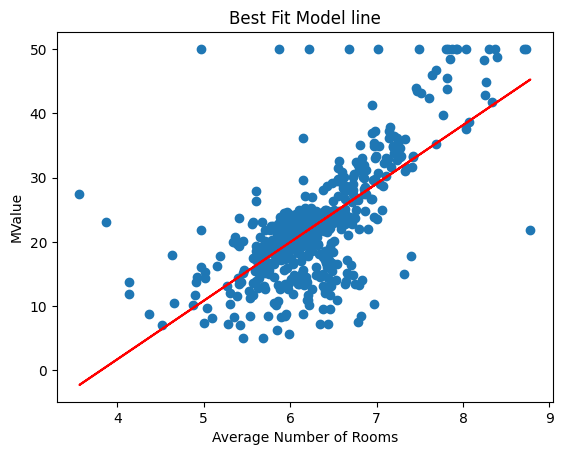

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x='Avg_rooms', y='MValue', data=data)
ax.plot(data.Avg_rooms, data.min_best_fit_model, color='red')
ax.set_ylabel('MValue')
ax.set_xlabel('Average Number of Rooms')
ax.set_title('Best Fit Model line')


In [ ]:
best_fit_model_obs = pd.DataFrame({
    'Avg_rooms': data['Avg_rooms'],
    'Actual MValue': data.MValue,
    'Predicted MValue': data.min_best_fit_model,
    'Error': (data.min_best_fit_model - data.MValue)
})
sum(best_fit_model_obs.Error**2)

22061.879196211812

In the above code, we find  the sum of square errors for the best-fit model

In [ ]:
X = data[['Avg_rooms']]
y = data['MValue']
model = LinearRegression()
model.fit(X, y)


LinearRegression()

We use the linear Regression model, First splitting data into x and y, where we fit them into the model.

In [ ]:
r_sq = model.score(X, y)
print('R-squared:', r_sq)


R-squared: 0.48330907782928245


In the above code we find the value of the R-squared value for the model

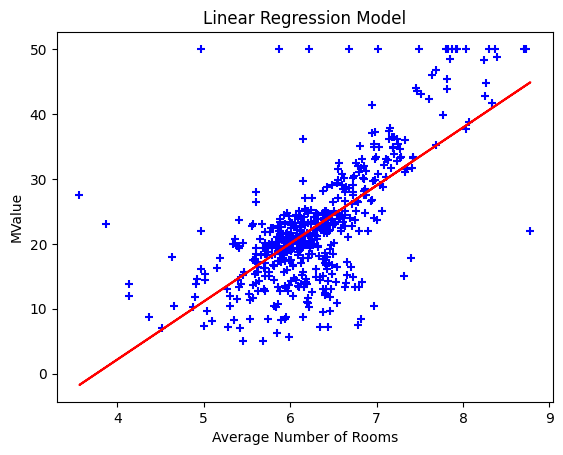

In [ ]:
plt.scatter(X, y, color='blue', marker='+')
plt.plot(X, model.predict(X), color='red')
plt.xlabel('Average Number of Rooms')
plt.ylabel('MValue')
plt.title('Linear Regression Model')
plt.show()

In [15]:
X = data[['Avg_rooms']]
y = data['MValue']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
sse = np.sum((y - y_pred) ** 2)
ssr = np.sum((y_pred - np.mean(y)) ** 2)
sst = np.sum((y - np.mean(y)) ** 2)
r_squared = ssr / sst
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"SSE: {sse}")
print(f"SSR: {ssr}")
print(f"SST: {sst}")
print(f"R-squared (manual): {r_squared}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (sklearn): {r2}")

SSE: 22061.879196211805
SSR: 20654.416218807964
SST: 42716.29541501976
R-squared (manual): 0.4835254559913341
Mean Squared Error: 43.60055177116958
R-squared (sklearn): 0.4835254559913339
